In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def model(T, s):
    rho_model= 9.999e2 + 2.034e-2*T - 6.162e-3*T**2 + 2.261e-5*T**3 - 4.657e-8*T**4 + 8.020e2*s - 2.001*s*T + 1.677e-2*s* T**2 - 3.060e-5*s*T**3 - 1.613e-5*s**2*T**2
    return(rho_model)

In [3]:
def modelNEW(T, s, P):
    A = 5.916365 - 0.01035794 * T + 0.9270048e-5 * T**2 - 1127.522 * (1/T) + 100674.1 * (1/T**2)
    B = 0.5204914e-2 - 0.10482101e-4 * T + 0.8328532e-8 * T**2 - 1.1702939 * (1/T) + 102.2783 * (1/T**2)
    C = 0.11854e-7 - 0.6599143e-10 * T
    D = - 2.5166 + 0.0111766 * T - 0.170552e-4 * T**2
    E = 2.84851 - 0.0154305 * T + 0.22398e-4 * T**2
    F = - 0.0014814 + 0.82969e-5 * T - 0.12469e-7 * T**2
    G = 0.0027141 - 0.15391e-4 * T + 0.22655e-7 * T**2
    H = 0.62158e-6 - 0.40075e-8 * T + 0.65972e-11 * T**2
    rho_NEW = 1000 / (A - B*P - C*P**2 + D*s + E*s**2 + F*s*P - G*(s**2)*P - H*s*P**2)
    return(rho_NEW)

In [4]:
s0 = 0.0
smax = 0.23

N = 1000

ds = smax/N

N150 = int(np.floor(0.15/ds))

print(N150)

T0 = 40.0
P0 = 8.0

652


In [5]:
vecrho_model = []
vecrho_NEW = []
vecs = []

for i in range(N):
    s = s0 + i * ds

    rho_model = model(T0, s)
    rho_NEW = modelNEW(T0+273.15,s,P0)

    vecrho_model.append(rho_model)
    vecrho_NEW.append(rho_NEW)
    vecs.append(s)

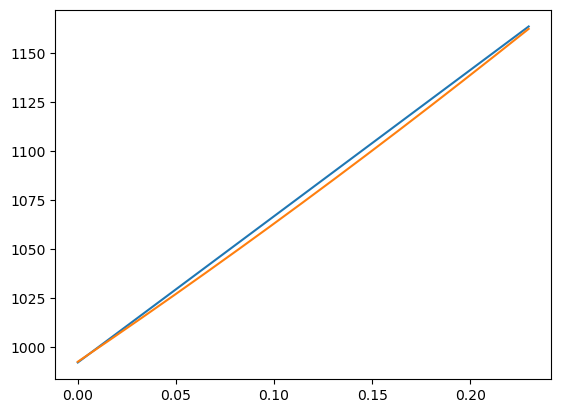

In [6]:

plt.plot(vecs,vecrho_model,vecs,vecrho_NEW)
plt.show()

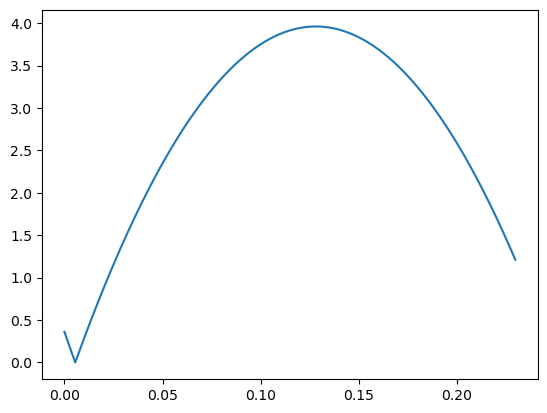

In [7]:
rel_error = abs(np.array(vecrho_model)-np.array(vecrho_NEW))
plt.plot(vecs,rel_error)
plt.show()

In [11]:
T1 = 1
T2 = 100
dT = (T2-T1)/N

vecrhoT_model = []
vecrhoT_NEW = []
vecT = []

for j in range(N):
    T = T1 + j * dT

    rho_model = model(T, smax)
    rho_NEW = modelNEW(T+273.15, smax, P0)

    vecrhoT_model.append(rho_model)
    vecrhoT_NEW.append(rho_NEW)
    vecT.append(T)

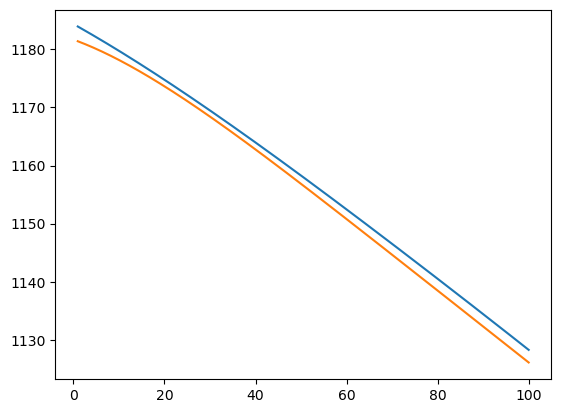

In [12]:
plt.plot(vecT,vecrhoT_model,vecT,vecrhoT_NEW)
plt.show()